In [1]:
import keras
from keras.models import Sequential 
from keras.layers import Dropout, Activation, Dense 
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def pngarray(name):
    x = image.load_img(name, target_size = (250, 250))
    x = image.img_to_array(x)
    x /= 255
    return x

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32, (3, 3), input_shape = (250, 250, 3), name = "Con2D_1"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), name = "Con2D_2"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Con2D_1 (Conv2D)             (None, 248, 248, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
Con2D_2 (Conv2D)             (None, 122, 122, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 122, 122, 64)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)      

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
x_t  = np.load("catdog.npy")
x_t = x_t.astype(float)
x_t /= 255

In [22]:
y_t = np.load("ans.npy")

In [19]:
mario.fit(x_t, y_t, batch_size = 100, epochs = 20)

Epoch 1/20
400/400 [==============================] - 23s 57ms/step - loss: 0.4760 - accuracy: 0.7650
Epoch 2/20
400/400 [==============================] - 23s 57ms/step - loss: 0.4508 - accuracy: 0.8000
Epoch 3/20
400/400 [==============================] - 23s 57ms/step - loss: 0.3858 - accuracy: 0.8675
Epoch 4/20
400/400 [==============================] - 23s 57ms/step - loss: 0.3353 - accuracy: 0.8525
Epoch 5/20
400/400 [==============================] - 23s 58ms/step - loss: 0.3288 - accuracy: 0.8775
Epoch 6/20
400/400 [==============================] - 23s 58ms/step - loss: 0.3101 - accuracy: 0.8850
Epoch 7/20
400/400 [==============================] - 23s 58ms/step - loss: 0.2355 - accuracy: 0.9350
Epoch 8/20
400/400 [==============================] - 23s 56ms/step - loss: 0.1916 - accuracy: 0.9375
Epoch 9/20
400/400 [==============================] - 23s 58ms/step - loss: 0.1738 - accuracy: 0.9350
Epoch 10/20
400/400 [==============================] - 24s 59ms/step - loss: 0.129

In [10]:
print(x_t.shape, y_t.shape)

(400, 250, 250, 3) (400, 2)


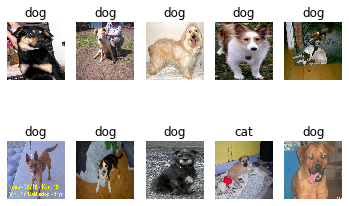

In [29]:
for i in range(21, 31):
    x = pngarray(f"{i}.jpg")
    x = np.expand_dims(x, axis = 0)
    plt.subplot(2,5, i- 20)
    plt.axis("off")
    plt.title("dog" if np.argmax(mario.predict(x)) == 0 else "cat")
    plt.imshow(x.reshape(250, 250, 3))

In [23]:
score = model.evaluate(x_t, y_t)
print(score[0], score[1])

200/200 [==============================] - 3s 13ms/step
0.047236369401216505 1.0


In [30]:
model.save("DogCat.h5")